# Assignment 4: Unsupervised Learning

## Harsh Sanjay Roniyar - 22B3942

---
Assignment Demo Link : https://drive.google.com/drive/folders/114XixrsEqXIUgNqFANPz6-iD7xAPEsjg?usp=sharing

--- 

### My Code Structure
- For functions (if any), I have added a special description of the input parameters and the return values for the corresponding function. This serves two purposes, helps me in code readability and ease of understanding for the viewer.
- All libraries used for the questions have been imported at the start of the main code (except when explicitly asked in the specific question).
- For the code blocks or lines, where a reference is not cited implies that I have done that part completely out of my understanding and previous knowledge.
- For the referenced parts, the list of references is the last cell of this notebook.
- Additionally, for lines without comments imply that either it is part of the base code or is a repetitive chunk across cells.

---

### Importing the required libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # color map
import seaborn as sns

#### `sklearn` modules

In [54]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, mean_squared_error, silhouette_samples, davies_bouldin_score

In [48]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from kneed import KneeLocator

### Some base configuration for the libraries

In [4]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

## Objective:
Derive customer insights based on their credit card use features

## Part 1: Data Pre-Processing

In [ ]:
df = pd.read_csv("Customer-Data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Explore the data
df.info()

In [6]:
df.shape

(8950, 18)

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204822,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634780,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Let's visualize the data now to observe the distributions so that any possible skewness can be identified.

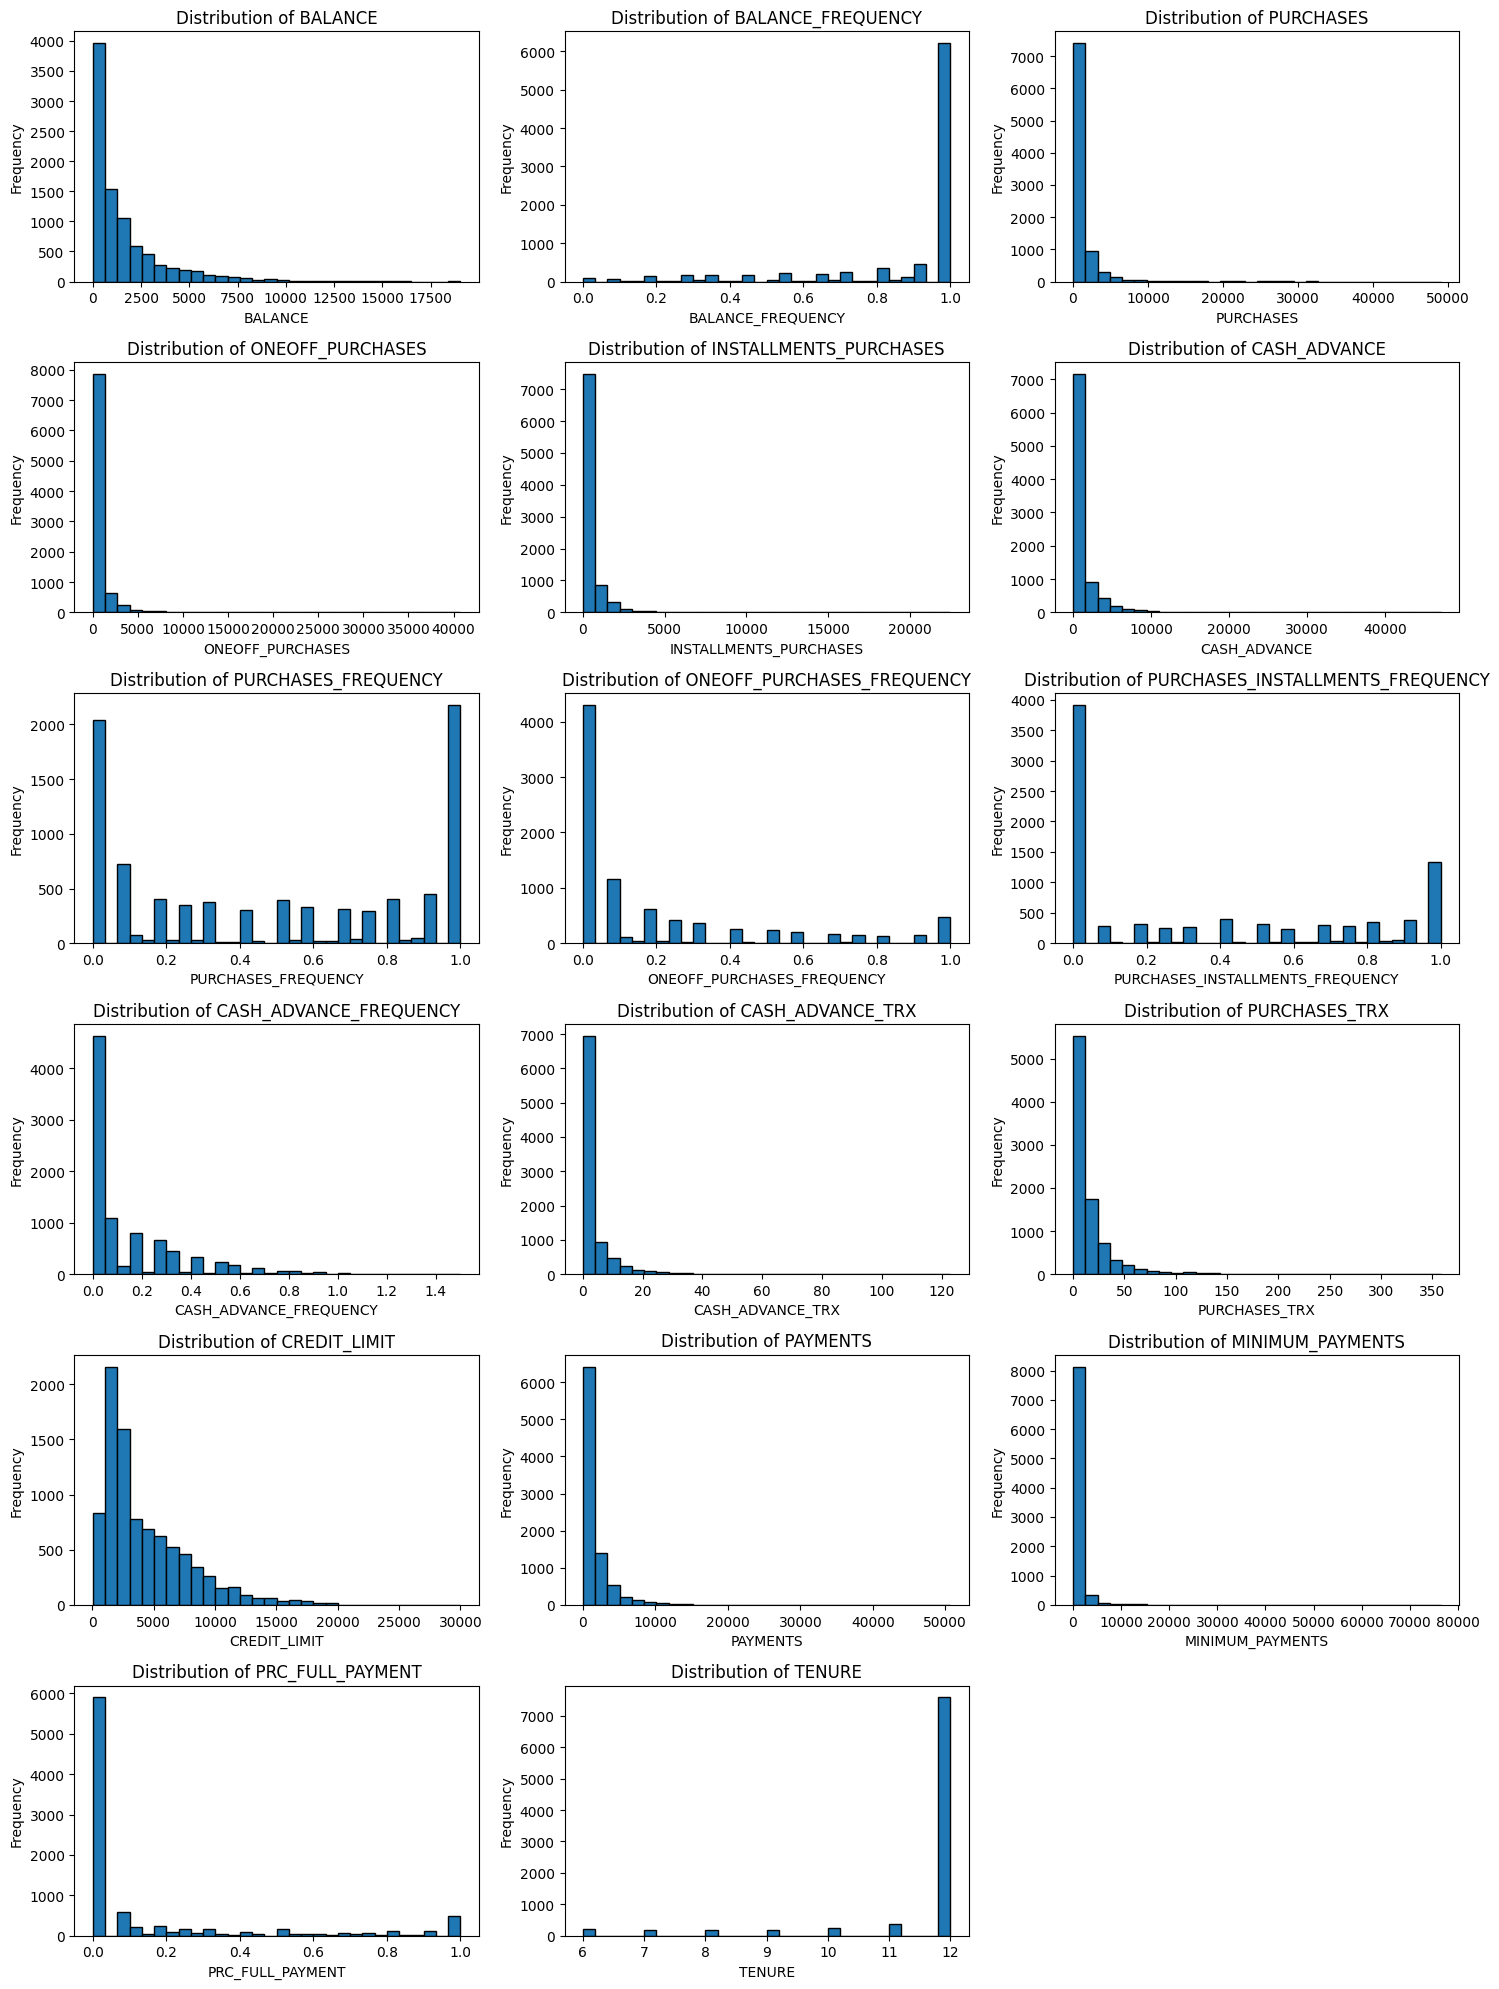

In [16]:
# # Visualize distributions of features
# df.hist(bins=30, figsize=(18, 12))
# plt.show()
# Plot distribution without binning

# Plot distribution of all numerical features in a single plot using multiple subplots
num_columns = df.select_dtypes(include=[np.number]).columns
num_plots = len(num_columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

for i, column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df[column], bins=30, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(num_plots, 18):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

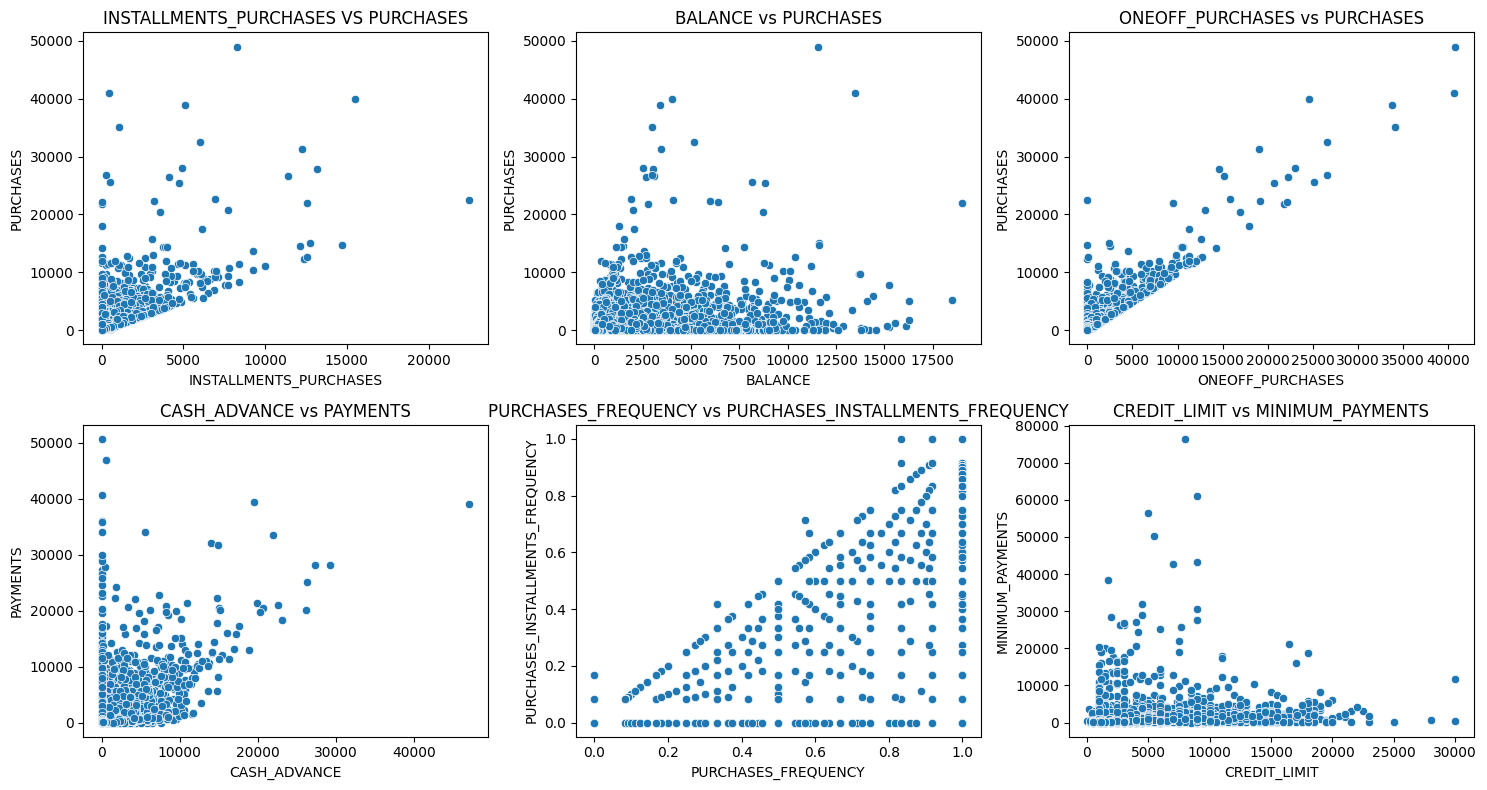

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Scatter plot 0
sns.scatterplot(x=df['INSTALLMENTS_PURCHASES'], y=df['PURCHASES'], ax=axes[0, 0])
axes[0, 0].set_title('INSTALLMENTS_PURCHASES VS PURCHASES')

# Scatter plot 1
sns.scatterplot(x=df['BALANCE'], y=df['PURCHASES'], ax=axes[0, 1])
axes[0, 1].set_title('BALANCE vs PURCHASES')

# Scatter plot 2
sns.scatterplot(x=df['ONEOFF_PURCHASES'], y=df['PURCHASES'], ax=axes[0, 2])
axes[0, 2].set_title('ONEOFF_PURCHASES vs PURCHASES')

# Scatter plot 3
sns.scatterplot(x=df['CASH_ADVANCE'], y=df['PAYMENTS'], ax=axes[1, 0])
axes[1, 0].set_title('CASH_ADVANCE vs PAYMENTS')

# Scatter plot 4
sns.scatterplot(x=df['PURCHASES_FREQUENCY'], y=df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axes[1, 1])
axes[1, 1].set_title('PURCHASES_FREQUENCY vs PURCHASES_INSTALLMENTS_FREQUENCY')

# Scatter plot 5
sns.scatterplot(x=df['CREDIT_LIMIT'], y=df['MINIMUM_PAYMENTS'], ax=axes[1, 2])
axes[1, 2].set_title('CREDIT_LIMIT vs MINIMUM_PAYMENTS')

plt.tight_layout()
plt.show()

From the above histograms for the columns and a scatterplot of data variation, it can be seen that the data is concentrated to the left, and hence I will apply a power transformer.

Advantages of Power Transformer: It will find the best power according to which it scales the data, contrary to exponential and log which do not offer flexibility of tuning.

Before that, let us drop the highly correlated features since it increases the complexity of the data without significantly improving the model. 

In [ ]:
df.drop(['CUST_ID'], axis=1, inplace=True) # droppint the customer ID column as it is not needed for clustering

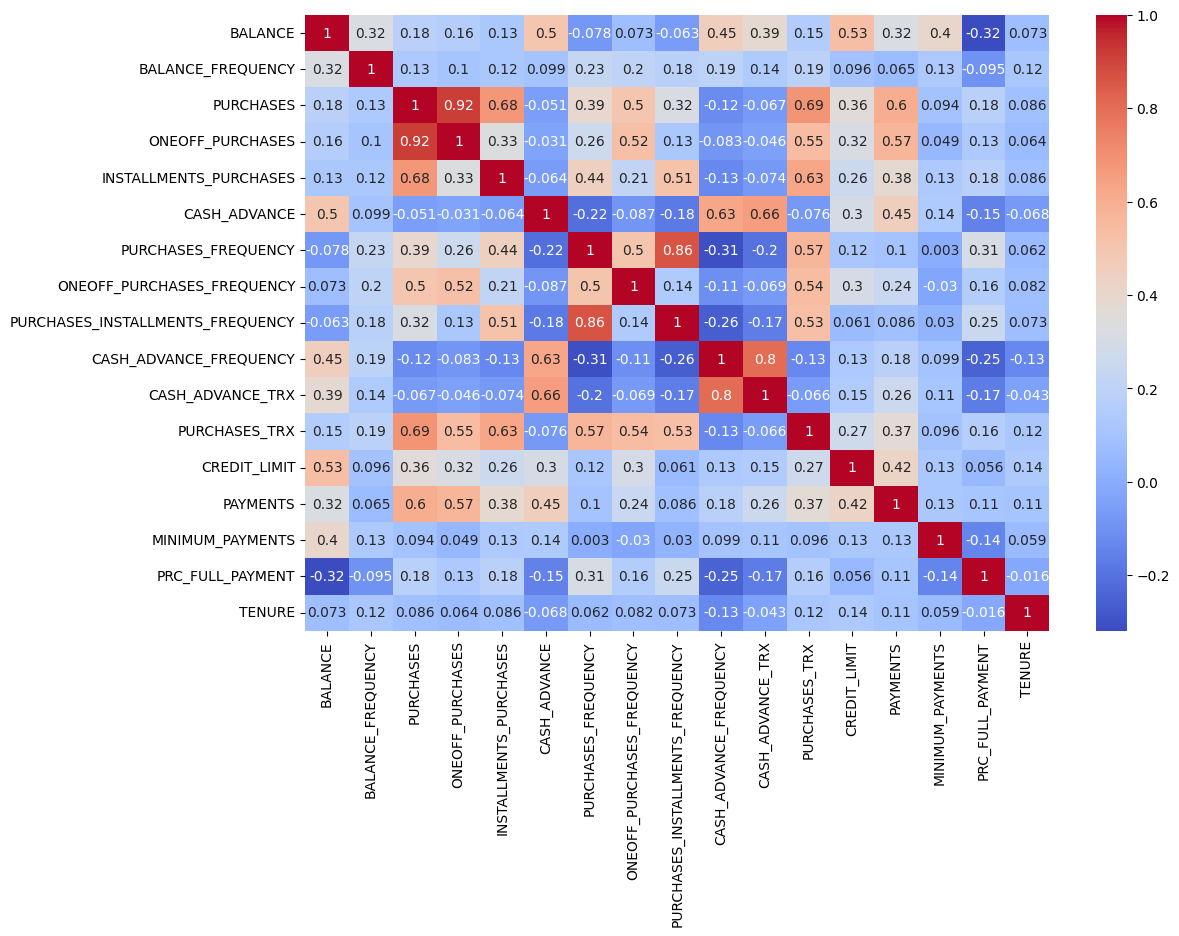

In [24]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [27]:
# Drop highly correlated features if correlation > 0.8
high_corr = correlation_matrix.abs().stack().reset_index().query("level_0 != level_1") # exclude diagonal elements (correlation with itself) from correlation matrix
high_corr = high_corr[high_corr[0] > 0.8]
to_drop = set(high_corr['level_1'])
data = df.drop(columns=to_drop)

Now, the dropping of columns is done, let us check for null values and then fill them appropriately.

In [28]:
# Check for missing value
data.isnull().sum()

BALANCE                         0
BALANCE_FREQUENCY               0
INSTALLMENTS_PURCHASES          0
CASH_ADVANCE                    0
ONEOFF_PURCHASES_FREQUENCY      0
CASH_ADVANCE_FREQUENCY          0
CASH_ADVANCE_TRX                0
PURCHASES_TRX                   0
CREDIT_LIMIT                    1
PAYMENTS                        0
MINIMUM_PAYMENTS              313
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

In [29]:
data.shape

(8950, 13)

We can see that the missing values are primarily in `MINIMUM_PAYMENTS` column and one in `CREDIT_LIMIT` column. The appropriate choice would be to fill those with the mean values of the respective columns, since they are both numerical values and denote currency.

In [30]:
data.fillna(data.mean(), inplace=True)

Finally, applying the `PowerTransformer`.

In [ ]:
# Apply PowerTransformer to remove skewness
pt = PowerTransformer()
data_transformed = pd.DataFrame(pt.fit_transform(data), columns=data.columns)

# # Check the transformed data
# data_transformed.head()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.238103,-1.079348,0.383704,-0.944538,-0.903315,-0.883204,-0.905801,-0.573664,-1.425364,-0.983876,-0.849237,-0.677889,0.422252
1,1.051961,-0.424939,-1.085422,1.399909,-0.903315,1.124423,1.044342,-1.387624,0.924151,1.285321,0.877661,1.235021,0.422252
2,0.860616,0.628612,-1.085422,-0.944538,1.732554,-0.883204,-0.905801,0.494757,1.012134,-0.291722,0.435065,-0.677889,0.422252
3,0.570542,-1.710851,-1.085422,0.680451,-0.092230,0.136071,0.194580,-0.872718,1.012134,-2.782085,0.700539,-0.677889,0.422252
4,0.111925,0.628612,-1.085422,-0.944538,-0.092230,-0.883204,-0.905801,-0.872718,-1.215737,-0.231669,-0.361555,-0.677889,0.422252


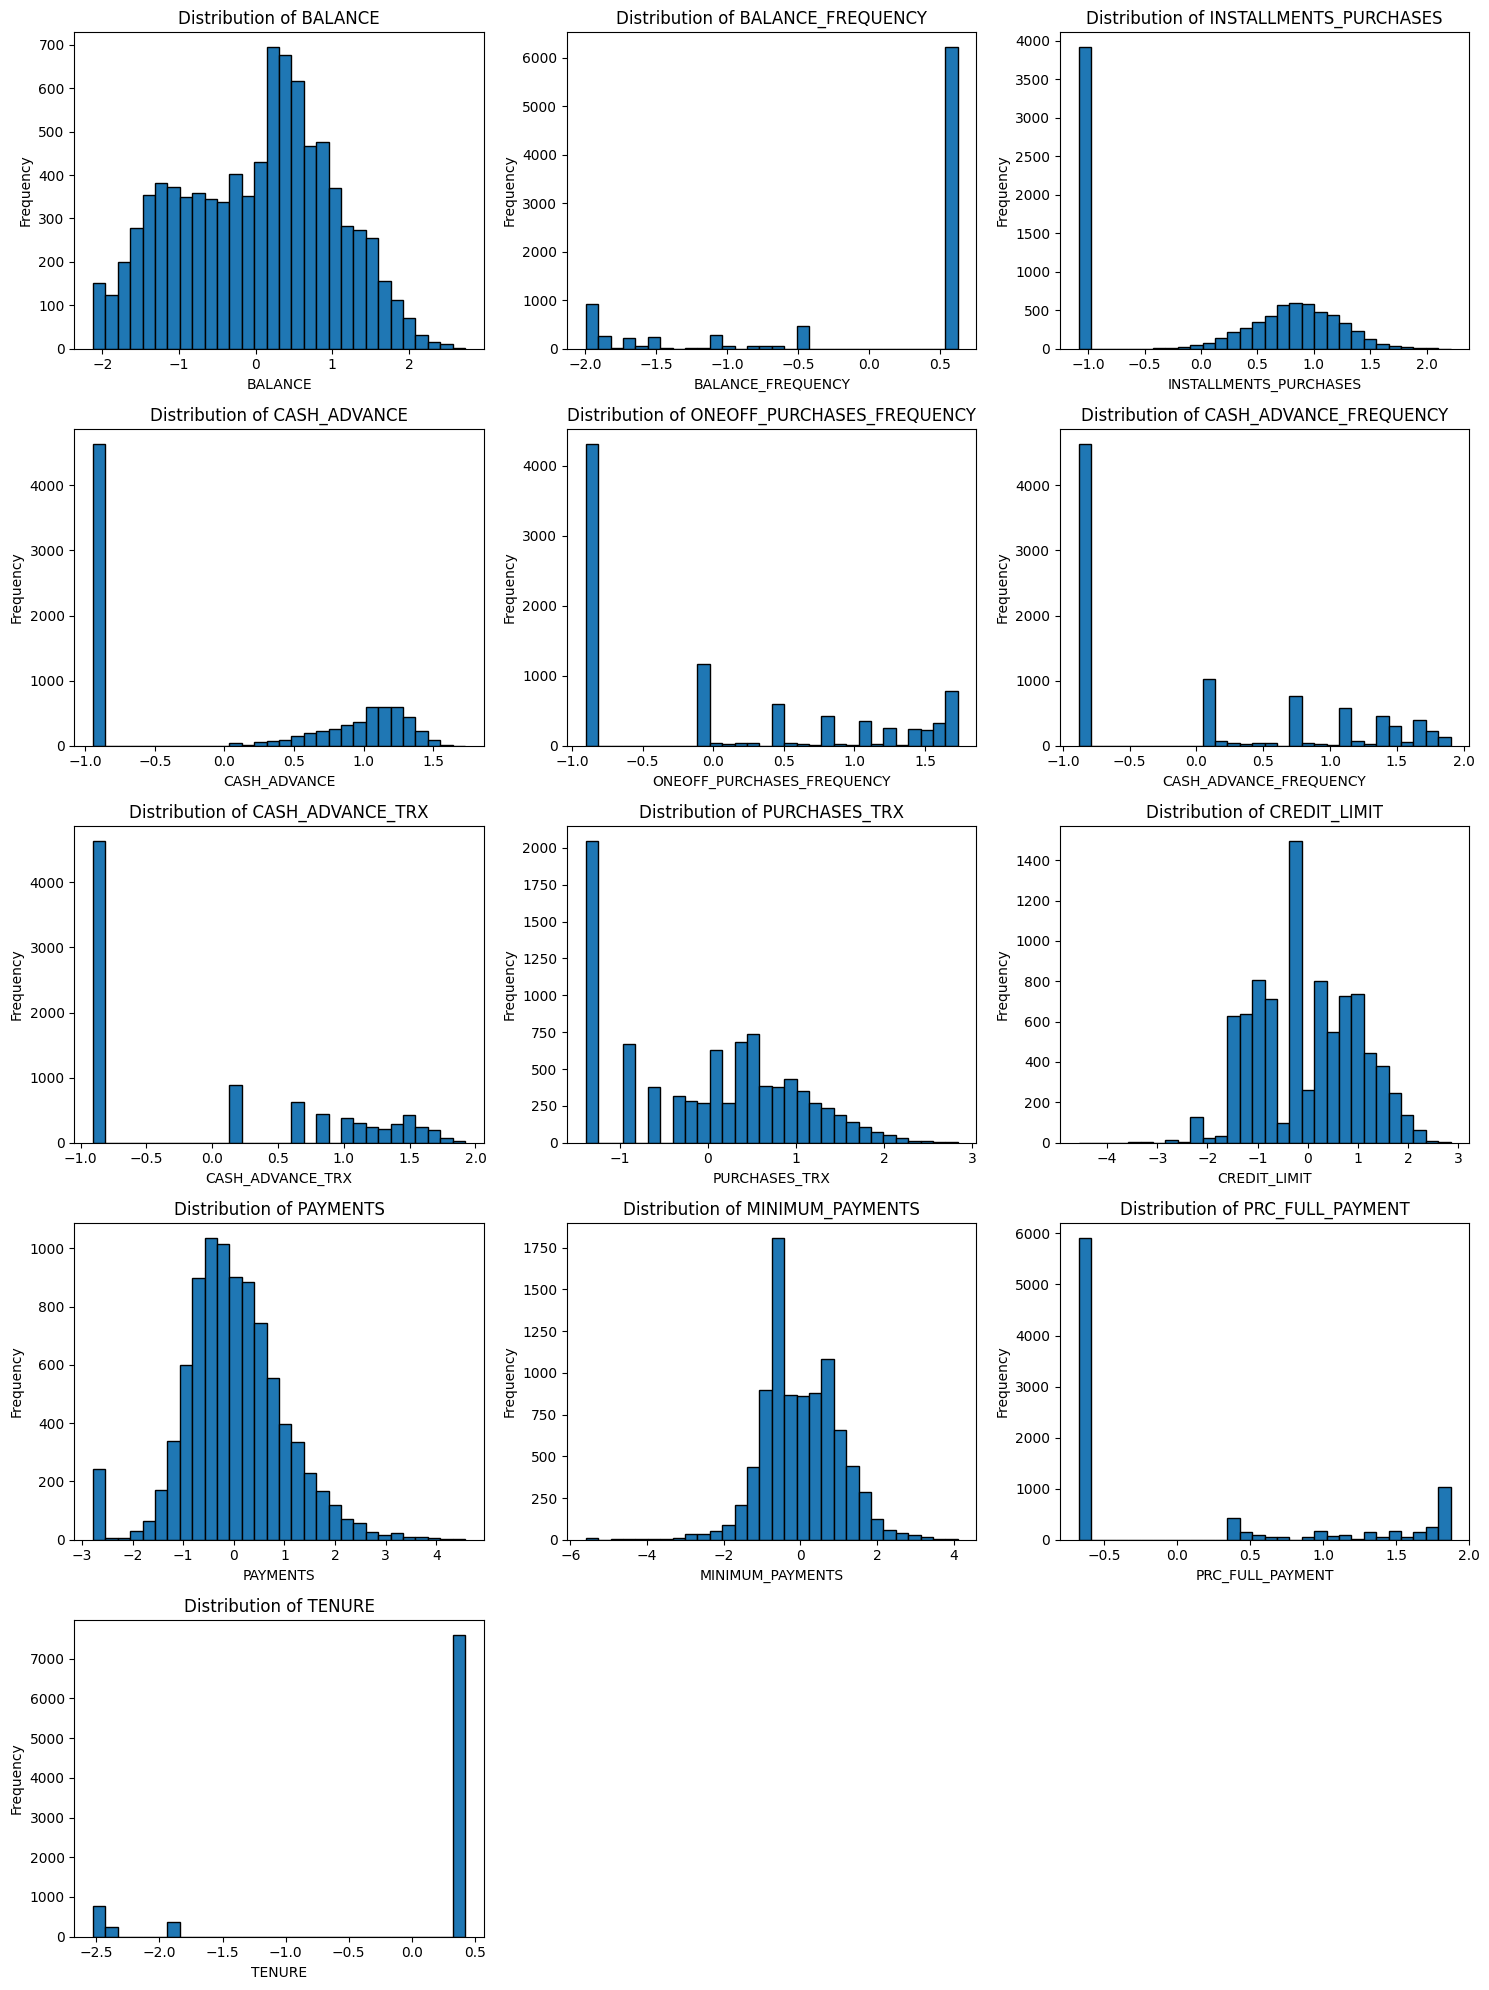

In [36]:
num_columns = data_transformed.select_dtypes(include=[np.number]).columns
num_plots = len(num_columns)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

for i, column in enumerate(num_columns):
    row = i // 3
    col = i % 3
    axes[row, col].hist(data_transformed[column], bins=30, edgecolor='black')
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Hide any empty subplots
for j in range(num_plots, 15):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

From, the histogram we can see that the skewness of the data has been removed to a great extent.

In [37]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE                     8950 non-null   float64
 1   BALANCE_FREQUENCY           8950 non-null   float64
 2   INSTALLMENTS_PURCHASES      8950 non-null   float64
 3   CASH_ADVANCE                8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY  8950 non-null   float64
 5   CASH_ADVANCE_FREQUENCY      8950 non-null   float64
 6   CASH_ADVANCE_TRX            8950 non-null   float64
 7   PURCHASES_TRX               8950 non-null   float64
 8   CREDIT_LIMIT                8950 non-null   float64
 9   PAYMENTS                    8950 non-null   float64
 10  MINIMUM_PAYMENTS            8950 non-null   float64
 11  PRC_FULL_PAYMENT            8950 non-null   float64
 12  TENURE                      8950 non-null   float64
dtypes: float64(13)
memory usage: 909.

Now, to ensure that the model treats each variable almost equally while training, let us apply normalization to our data using `StandardScaler`.

In [38]:
# Apply StandardScaler to all columns
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_transformed), columns=data_transformed.columns)

# Check the scaled data
data_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8.950000e+03,8.950000e+03
mean,-1.270244e-17,5.716098e-17,3.691647e-17,-2.222927e-17,-1.270244e-17,-9.526830e-18,2.381707e-18,-4.445854e-17,3.810732e-17,0.000000,0.000000,-3.175610e-18,-5.080976e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056,1.000056e+00,1.000056e+00
min,-2.120305e+00,-1.997716e+00,-1.085422e+00,-9.445384e-01,-9.033151e-01,-8.832040e-01,-9.058009e-01,-1.387624e+00,-4.572423e+00,-2.782085,-5.599812,-6.778889e-01,-2.526612e+00
25%,-8.168070e-01,-5.989922e-01,-1.085422e+00,-9.445384e-01,-9.033151e-01,-8.832040e-01,-9.058009e-01,-8.727179e-01,-8.806485e-01,-0.608905,-0.672468,-6.778889e-01,4.222524e-01
50%,1.516813e-01,6.286119e-01,3.611963e-01,-9.445384e-01,-9.222973e-02,-8.832040e-01,-9.058009e-01,1.432569e-01,-1.297492e-01,-0.064284,-0.091588,-6.778889e-01,4.222524e-01
75%,7.179130e-01,6.286119e-01,9.060999e-01,1.059052e+00,9.780771e-01,1.016910e+00,1.044342e+00,7.291175e-01,8.300141e-01,0.569453,0.700539,8.541173e-01,4.222524e-01
max,2.731227e+00,6.286119e-01,2.212015e+00,1.729923e+00,1.732554e+00,1.902718e+00,1.921254e+00,2.838620e+00,2.851975e+00,4.568553,4.112677,1.873638e+00,4.222524e-01


This completes the data pre-processing steps as appropriate.

## Part 2: Clustering
`[4, 5]`

### a. KMeans
`[1, 6]`

In [ ]:
# Finding optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

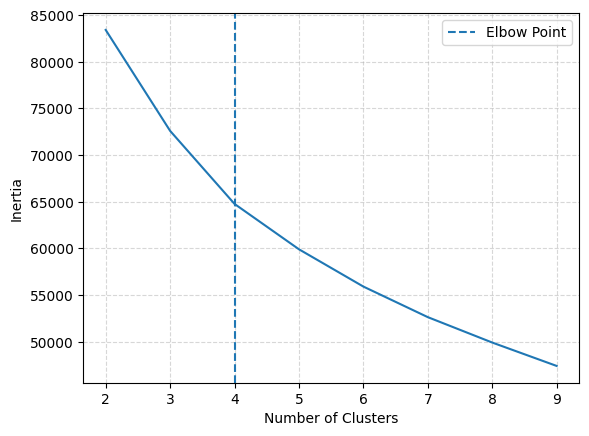

In [ ]:
knee = KneeLocator(list(k_range), inertia, curve='convex', direction='decreasing') # Find the elbow point using kneed library

plt.plot(k_range, inertia)
plt.xticks(k_range)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axvline(x=knee.elbow, label='Elbow Point', ls='--') # Plot the elbow point
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [71]:
def silhouette_plot(model, range_n_clusters, X_clustering, X_TSNE, **kwargs):
    """
    Plot silhouette plot for KMeans clustering
    :param model: KMeans model
    :param range_n_clusters: range of number of clusters
    :param X_clustering: data to be clustered
    :param X_TSNE: data to be visualized
    :param kwargs: additional arguments to be passed to the model
    :return: None
    """
    for n_clusters in range_n_clusters:
        # Create a figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

        # Set limits for the first subplot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clustering model
        clusterer = model(n_clusters, **kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # Calculate the average silhouette score
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

        # Calculate the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Fill the silhouette plot with cluster i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  # Update the y_lower for next plot

        # Set titles and labels for the first subplot
        ax1.set_title("Silhouette plot for the various clusters.")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Create a scatter plot for the clustered data
        sns.scatterplot(x=X_TSNE[:, 0], y=X_TSNE[:, 1], hue=cluster_labels, palette=sns.color_palette("bright", n_clusters), alpha=0.6, legend="full", ax=ax2)
        ax2.set_title("Visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        # Set the main title for the figure
        plt.suptitle(f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")

    plt.show()


In [ ]:
X_TSNE = TSNE( # Apply t-SNE to visualize the data
    n_components=2,
    random_state=42,
).fit_transform(data_scaled)

For n_clusters = 3, The average silhouette_score is : 0.22550907908145446
For n_clusters = 4, The average silhouette_score is : 0.2950491924011499
For n_clusters = 5, The average silhouette_score is : 0.26278333183101577
For n_clusters = 6, The average silhouette_score is : 0.26471893956986886


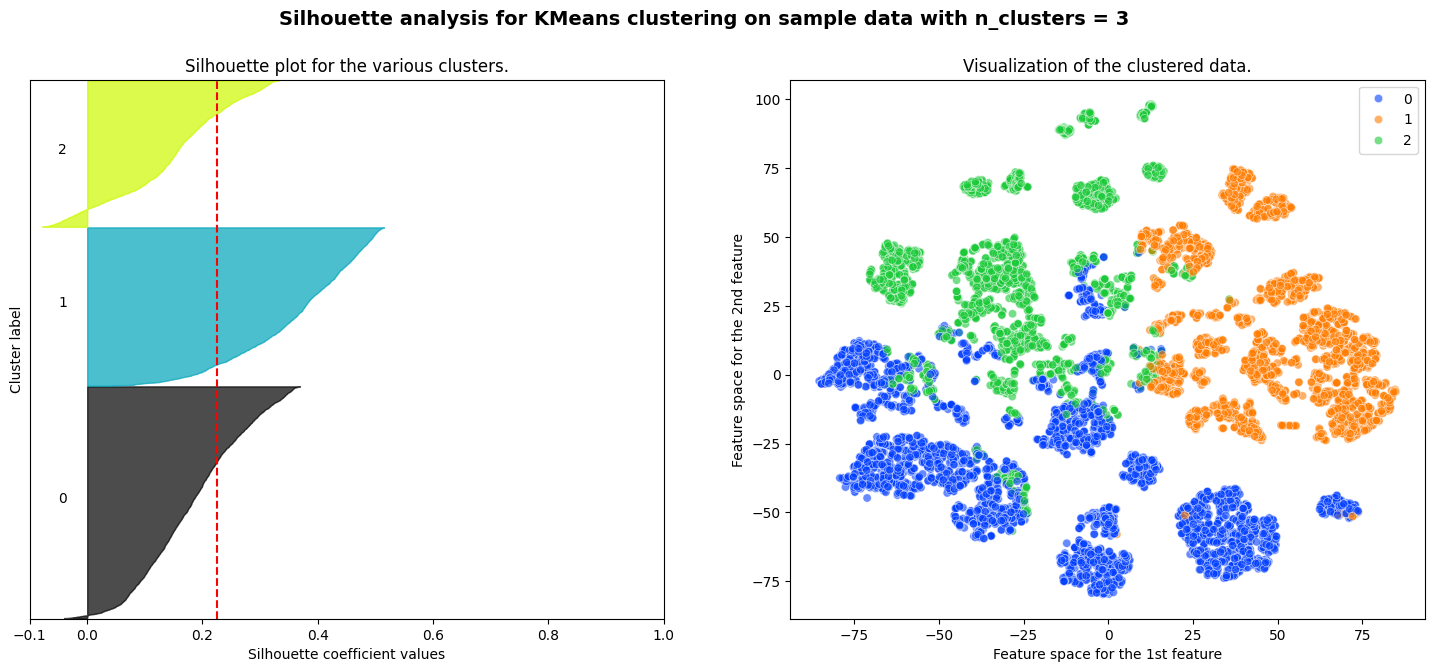

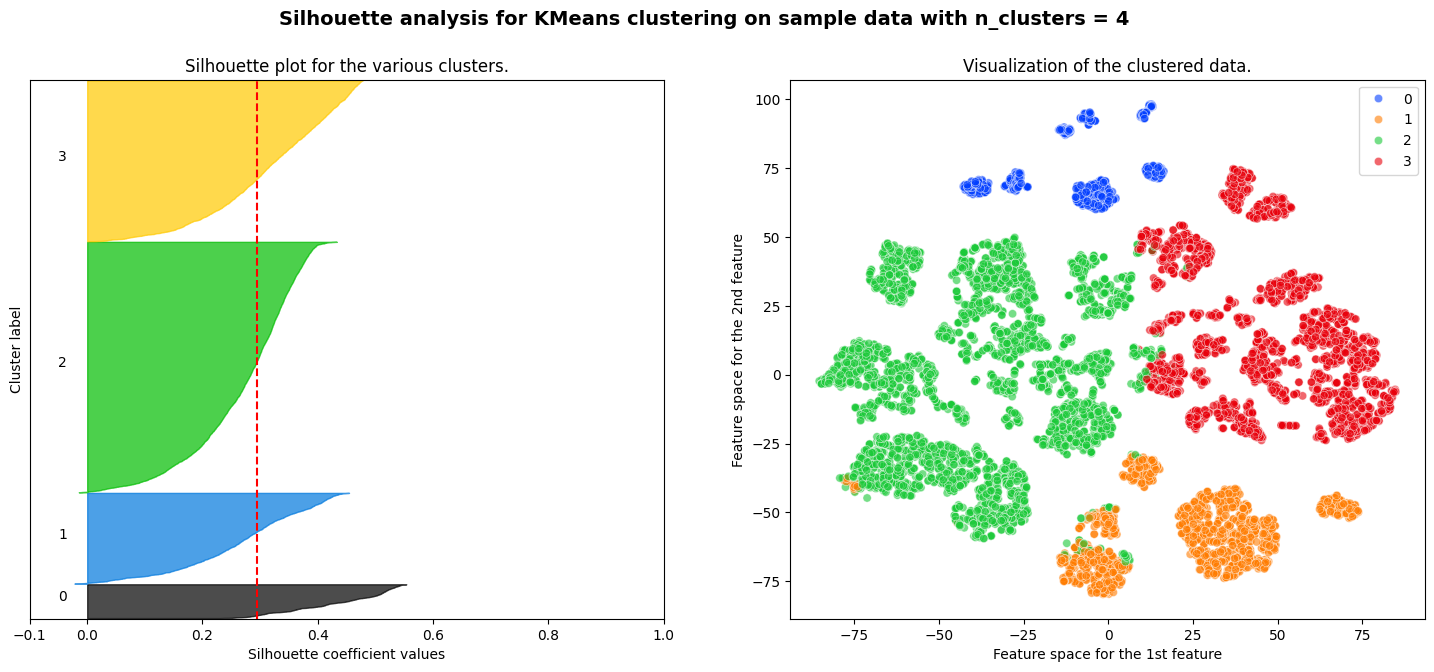

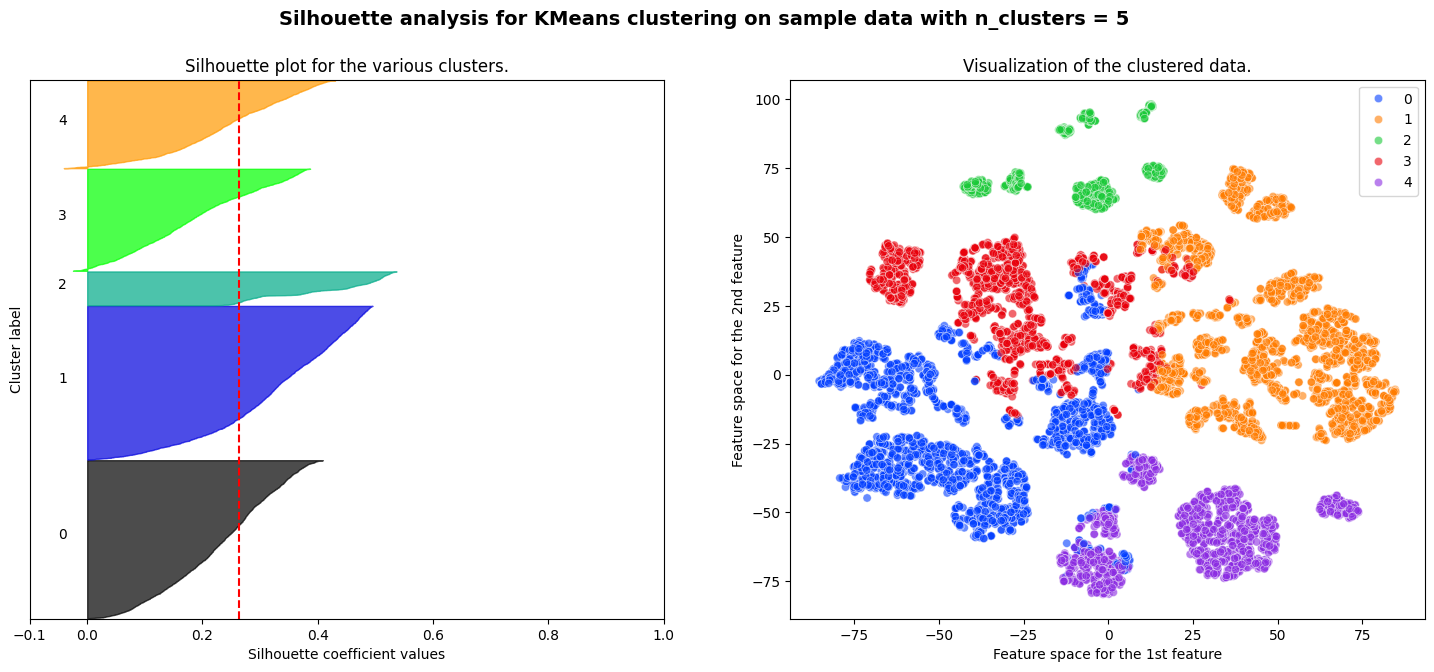

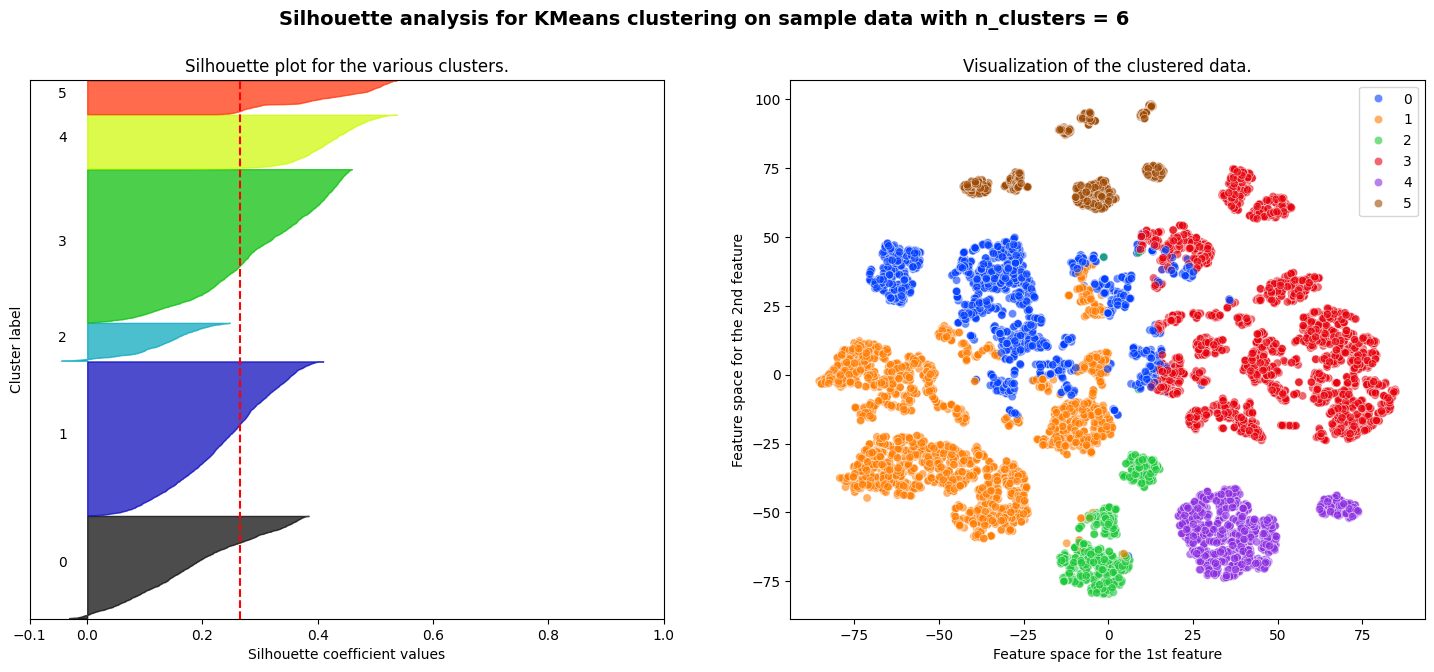

In [72]:
silhouette_plot(KMeans,range(3,7), data_scaled, X_TSNE)

We can see that the optimal number of `k` obtained is 4 from the above cluster plots with their corresponding silhouette scores.

In [74]:
# Fit K-means with optimal k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)
data_scaled['KMeans_Labels'] = kmeans.labels_

In [75]:
print("Silhouette Score: ", silhouette_score(data_scaled, kmeans.labels_))
print("Davies-Bouldin Score: ", davies_bouldin_score(data_scaled, kmeans.labels_))

Silhouette Score:  0.2693620677516977
Davies-Bouldin Score:  1.4413169608303993


### b. DBSCAN
`[2]`

----------------------------------------
eps=2.7, min_samples=25
Cluster Labels:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Silhouette Score: 0.26104383931924124
Davies-Bouldin Score: 1.0471784579540306
----------------------------------------
eps=2.7, min_samples=50
Cluster Labels:  [-1  0  1  2  3  4  5  6  7  8  9 10]
Silhouette Score: 0.2236544008355081
Davies-Bouldin Score: 1.1487243865849026
----------------------------------------
eps=2.7, min_samples=75
Cluster Labels:  [-1  0  1  2  3  4]
Silhouette Score: 0.25382684360927743
Davies-Bouldin Score: 1.2949325439387362
----------------------------------------
eps=2.7, min_samples=100
Cluster Labels:  [-1  0  1  2]
Silhouette Score: 0.23572207002898463
Davies-Bouldin Score: 1.1862404178818393
----------------------------------------
eps=2.7, min_samples=125
Cluster Labels:  [-1  0  1]
Silhouette Score: 0.24854172251393944
Davies-Bouldin Score: 0.9108935399623497


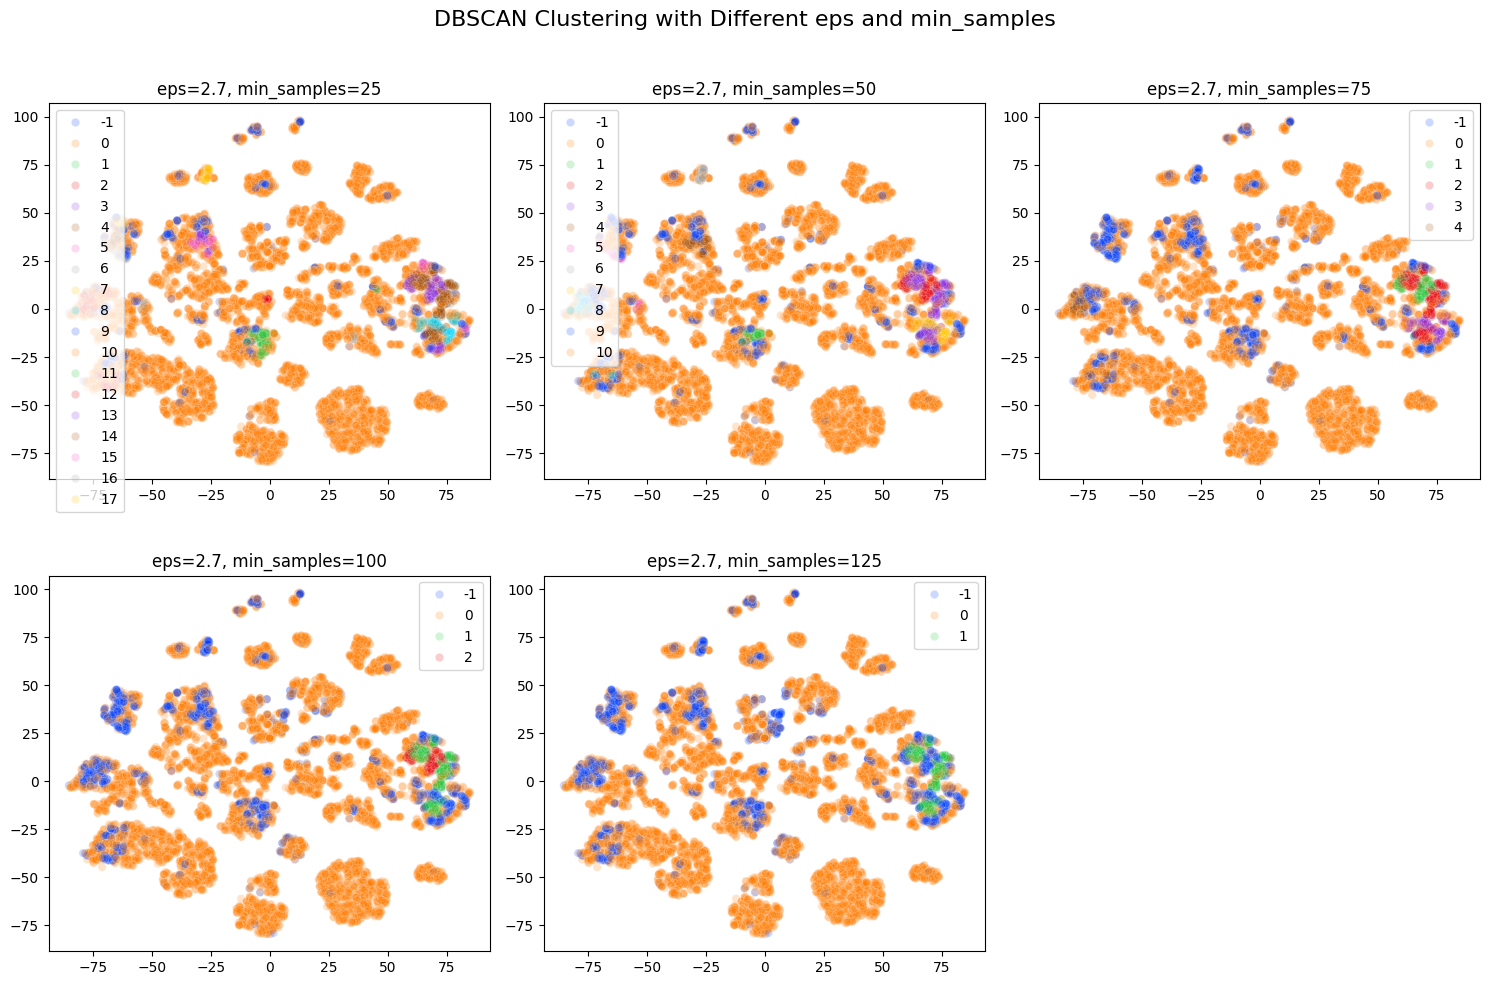

In [ ]:
# Define ranges for eps and min_samples
eps_range = [2.7]
min_samples_range = [25, 50, 75, 100, 125]

# Plot DBSCAN results for different eps and min_samples
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
fig.suptitle('DBSCAN Clustering with Different eps and min_samples', fontsize=16)

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data_scaled)
        labels = dbscan.labels_

        print('--'*20)
        print(f"eps={eps}, min_samples={min_samples}")
        unique_labels = np.unique(dbscan.labels_)
        print("Cluster Labels: ", np.array(unique_labels))

        # Calculate and display silhouette score and Davies-Bouldin score
        if len(set(dbscan.labels_)) > 1:  # Check if there is more than one cluster
            silhouette_avg = silhouette_score(data_scaled, dbscan.labels_)
            davies_bouldin_avg = davies_bouldin_score(data_scaled, dbscan.labels_)
            print(f"Silhouette Score: {silhouette_avg}")
            print(f"Davies-Bouldin Score: {davies_bouldin_avg}")
        else:
            print("DBSCAN did not find more than one cluster.")
        
        ax = axes[j // 3, j % 3]
        sns.scatterplot(
            x=X_TSNE[:, 0],
            y=X_TSNE[:, 1],
            hue=labels,
            palette=sns.color_palette("bright", len(set(labels))),
            alpha=0.2,
            ax=ax
        )
        ax.set_title(f'eps={eps}, min_samples={min_samples}')

# Hide any empty subplots
for j in range(len(min_samples_range), 6):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [152]:
# DBSCAN parameter tuning
eps_value = 2
min_samples_value = 100
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan.fit(data_scaled)

# Add DBSCAN labels to the dataset
data_scaled['DBSCAN_Labels'] = dbscan.labels_

dbscan.labels_
unique_labels = np.unique(dbscan.labels_)
print("Cluster Labels: ", np.array(unique_labels))

# Calculate and display silhouette score and Davies-Bouldin score
if len(set(dbscan.labels_)) > 1:  # Check if there is more than one cluster
    silhouette_avg = silhouette_score(data_scaled, dbscan.labels_)
    davies_bouldin_avg = davies_bouldin_score(data_scaled, dbscan.labels_)
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Score: {davies_bouldin_avg}")
else:
    print("DBSCAN did not find more than one cluster.")

Cluster Labels:  [-1  0  1  2  3]
Silhouette Score: 0.2068756878798044
Davies-Bouldin Score: 1.7946861462965273


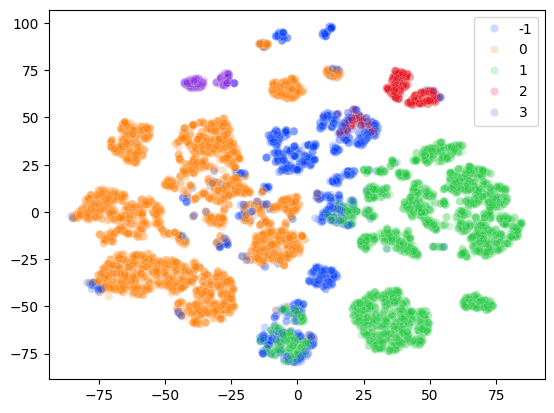

In [153]:
def TSNE_plot(X_TSNE,labels):
    sns.scatterplot(
        x = X_TSNE[:, 0],
        y = X_TSNE[:, 1],
        hue= labels ,
        palette=sns.color_palette("bright", len(set(labels))),
        alpha=0.2,
    )
    plt.show()

TSNE_plot(X_TSNE,dbscan.labels_)

### c. t-SNE Summary

Now, we can see after a lot of tuning we have obtained reasonable clusters for the DBSCAN assignments. In the following plots, I summarise the cluster visualizations obtained from KMeans as well as DBSCAN. 

`Note`: The label `-1` in the DBSCAN Labels indicate Noise, i.e. the algorithm could not classify those points based on the current criteria of $\epsilon$ and `min_samples`.

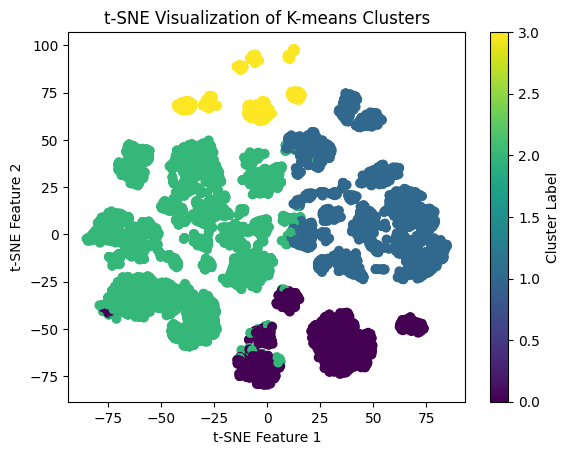

In [155]:
# Plot t-SNE results with KMeans labels
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization of K-means Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

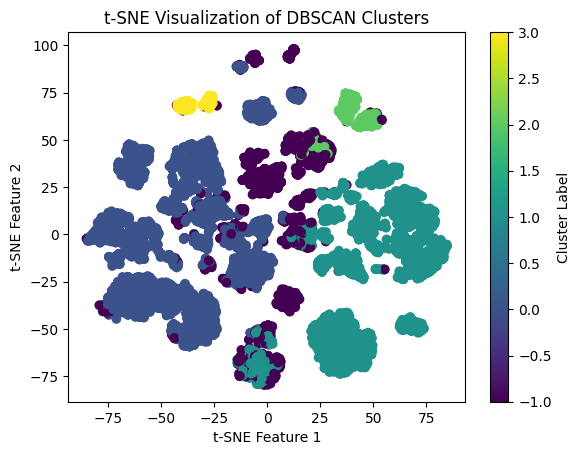

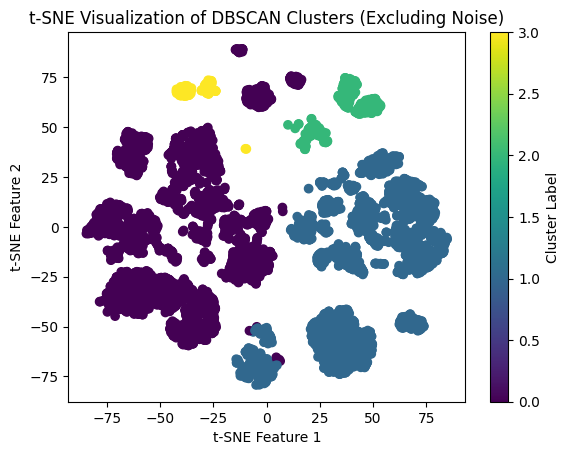

In [157]:
# Plot t-SNE results with DBSCAN labels
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c=dbscan.labels_, cmap='viridis')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

# Plot t-SNE results with DBSCAN labels excluding label -1
mask = dbscan.labels_ != -1
plt.scatter(X_TSNE[mask, 0], X_TSNE[mask, 1], c=dbscan.labels_[mask], cmap='viridis')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Visualization of DBSCAN Clusters (Excluding Noise)')
plt.colorbar(label='Cluster Label')
plt.show()

### d. Cluster Naming
`[3]`

In [159]:
clusters = pd.concat([pd.DataFrame({'cluster':kmeans.labels_}), df], axis=1)
clusters.head()

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,2,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
columns = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
clusters_results = clusters.groupby('cluster')[columns].sum() # Sum of all columns for each cluster
clusters_results

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
cluster,,,,,,,,
0,5.074128e+06,2695572.61,1654471.13,1041489.44,3.650325e+06,9.294350e+06,4.825658e+06,2.378818e+06
1,5.488585e+06,182485.51,155354.28,27185.95,5.054852e+06,1.037314e+07,4.079720e+06,2.492493e+06
2,3.405151e+06,5870141.30,3359622.76,2512462.49,5.571951e+04,1.879921e+07,6.299399e+06,2.538570e+06
3,3.418537e+04,230483.74,132866.30,97917.54,0.000000e+00,1.754127e+06,3.068616e+05,5.427011e+04


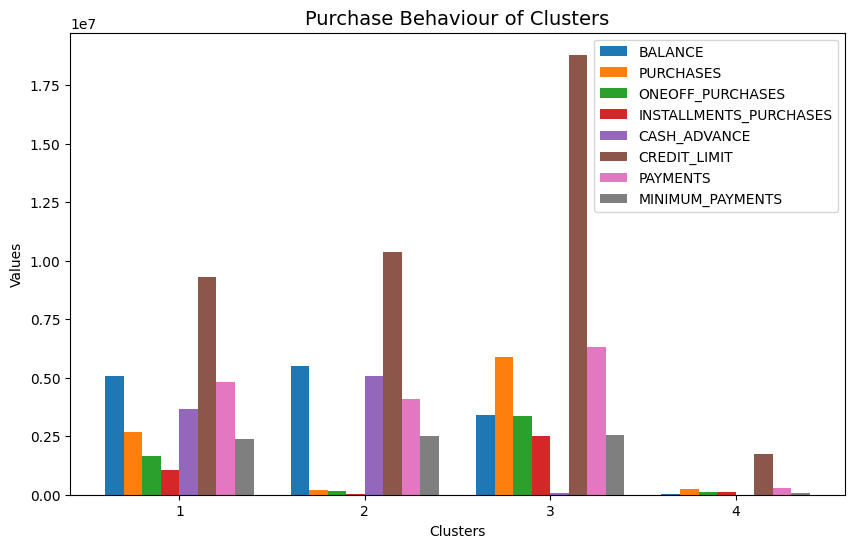

In [168]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

x_labels = np.arange(1, 5)
bar_width = 0.1  # Width of each bar
offset = np.arange(len(clusters_results.columns)) * bar_width  # Offset for each column

# Plot each column as a bar
for i, column in enumerate(clusters_results.columns):
    ax.bar(x_labels + offset[i], clusters_results[column].values, width=bar_width, label=column)

# Set the title and labels
ax.set_title("Purchase Behaviour of Clusters", fontsize=14)
ax.set_xlabel("Clusters")
ax.set_ylabel("Values")
ax.set_xticks(x_labels + bar_width * (len(clusters_results.columns) - 1) / 2)
ax.set_xticklabels(x_labels)
ax.legend()

plt.show()

The 4 clusters that we have primarily obtained can be labelled as - 

- Cluster 1: "Conservative Spenders" – Moderate use, cautious spending, prefer installment purchases.
- Cluster 2: "Cash-Advance Users" – High activity across purchases and cash advances.
- Cluster 3: "High Spenders" – Higher purchases mostly installment purchases, no cash advance usage.
- Cluster 4: "Dormant Users" – Extremely low activity across all parameters.

## Part 3. PCA
`[7]`

In [172]:
data_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeans_Labels,DBSCAN_Labels
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8.950000e+03,8.950000e+03,8950.000000,8950.000000
mean,-1.270244e-17,5.716098e-17,3.691647e-17,-2.222927e-17,-1.270244e-17,-9.526830e-18,2.381707e-18,-4.445854e-17,3.810732e-17,0.000000,0.000000,-3.175610e-18,-5.080976e-17,1.424358,0.310391
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056,1.000056,1.000056e+00,1.000056e+00,0.842383,0.859679
min,-2.120305e+00,-1.997716e+00,-1.085422e+00,-9.445384e-01,-9.033151e-01,-8.832040e-01,-9.058009e-01,-1.387624e+00,-4.572423e+00,-2.782085,-5.599812,-6.778889e-01,-2.526612e+00,0.000000,-1.000000
25%,-8.168070e-01,-5.989922e-01,-1.085422e+00,-9.445384e-01,-9.033151e-01,-8.832040e-01,-9.058009e-01,-8.727179e-01,-8.806485e-01,-0.608905,-0.672468,-6.778889e-01,4.222524e-01,1.000000,0.000000
50%,1.516813e-01,6.286119e-01,3.611963e-01,-9.445384e-01,-9.222973e-02,-8.832040e-01,-9.058009e-01,1.432569e-01,-1.297492e-01,-0.064284,-0.091588,-6.778889e-01,4.222524e-01,2.000000,0.000000
75%,7.179130e-01,6.286119e-01,9.060999e-01,1.059052e+00,9.780771e-01,1.016910e+00,1.044342e+00,7.291175e-01,8.300141e-01,0.569453,0.700539,8.541173e-01,4.222524e-01,2.000000,1.000000
max,2.731227e+00,6.286119e-01,2.212015e+00,1.729923e+00,1.732554e+00,1.902718e+00,1.921254e+00,2.838620e+00,2.851975e+00,4.568553,4.112677,1.873638e+00,4.222524e-01,3.000000,3.000000


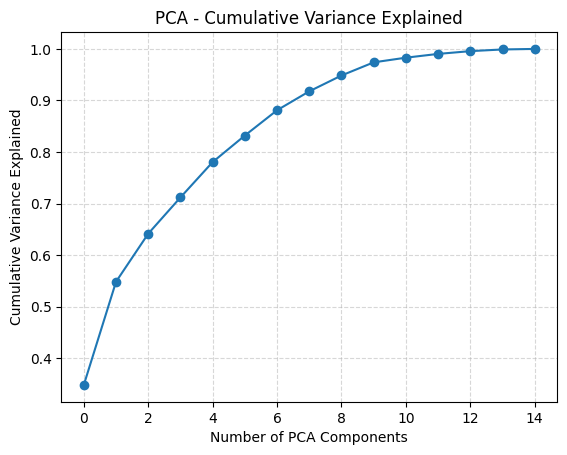

In [ ]:
data_scaled_pca = data_scaled.copy()

# Train PCA
pca = PCA()
pca.fit(data_scaled_pca)
explained_variance = pca.explained_variance_ratio_ # Get explained variance of each component
# Plot cumulative variance explained
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Variance Explained')
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

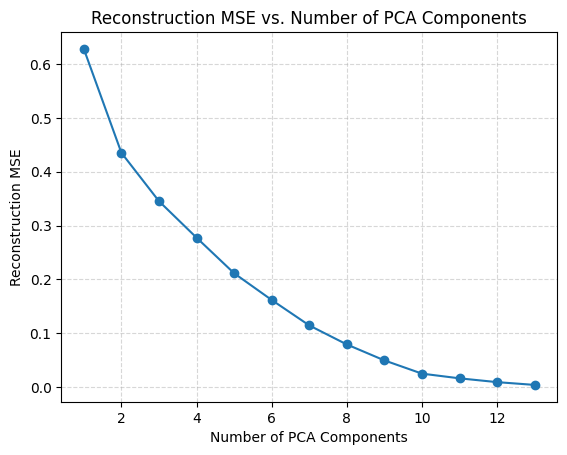

In [ ]:
# Calculate MSE for different numbers of PCA components
mse_scores = []
components = range(1, 14)

for n in components:
    pca = PCA(n_components=n)
    reduced_data = pca.fit_transform(data_scaled) # Fit and transform the data
    reconstructed_data = pca.inverse_transform(reduced_data) # Inverse transform the reduced data
    mse = mean_squared_error(data_scaled, reconstructed_data) # Calculate the mean squared error
    mse_scores.append(mse)

# Plot MSE vs. number of components
plt.plot(components, mse_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction MSE')
plt.title('Reconstruction MSE vs. Number of PCA Components')
plt.grid(visible=True, linestyle='--', alpha=0.5)

plt.show()

From this we can see, that the variance explained of about 80% is captured with only 4 PCA components and more than 90% with only 7 PCA components.

## References

A list of the references that I have used for the purpose of this assignment:

1. [Plot for KMeans with Silhouette Values](https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
2. [ChatGPT] Write a customised code for varying eps and min_samples values dynamically in DBSCAN
3. [Cluster Variations](https://www.kaggle.com/code/mhelgarnosy/k-means-kpca-clustering-visualization-on-t-sne?scriptVersionId=98876246&cellId=75)
4. [DBSCAN scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
5. [KMeans scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
6. [Knee Locator](https://kneed.readthedocs.io/en/stable/api.html#kneed.knee_locator.KneeLocator)
7. [PCA scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)